<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Lineare-Algebra-II" data-toc-modified-id="Lineare-Algebra-II-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lineare Algebra II</a></span><ul class="toc-item"><li><span><a href="#Matrixplots" data-toc-modified-id="Matrixplots-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Matrixplots</a></span></li><li><span><a href="#Eigenwerte,-Eigenvektoren,-Jordannormalform" data-toc-modified-id="Eigenwerte,-Eigenvektoren,-Jordannormalform-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Eigenwerte, Eigenvektoren, Jordannormalform</a></span></li><li><span><a href="#Berechung-des-Rangs" data-toc-modified-id="Berechung-des-Rangs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Berechung des Rangs</a></span></li><li><span><a href="#Normen" data-toc-modified-id="Normen-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normen</a></span></li><li><span><a href="#Kreuzprodukt" data-toc-modified-id="Kreuzprodukt-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Kreuzprodukt</a></span></li></ul></li><li><span><a href="#Reihenentwicklung-(Taylor)" data-toc-modified-id="Reihenentwicklung-(Taylor)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reihenentwicklung (Taylor)</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing()
x,y,z = symbols('x y z')
%matplotlib notebook

# Lektion 10 
## Lineare Algebra II

### Matrixplots

In [2]:
H = Matrix(20,20,lambda i,j : 1/(i+j+1))

<IPython.core.display.Javascript object>


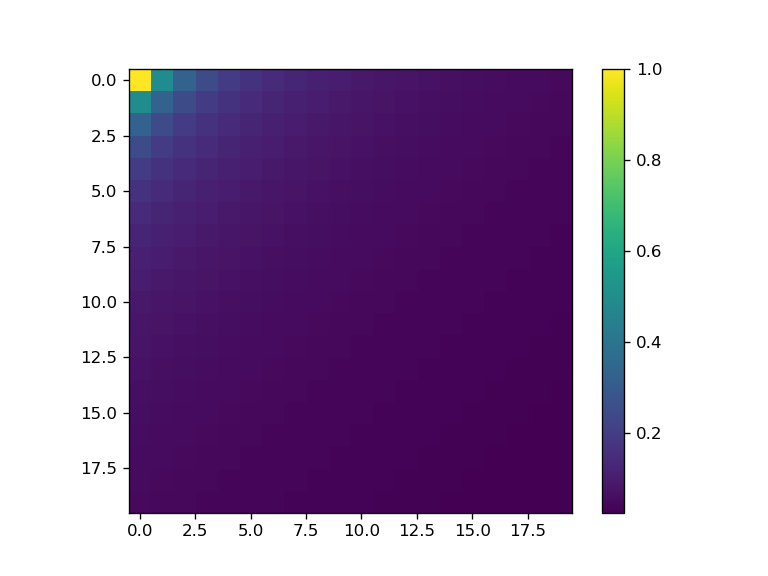

In [3]:
HH = matrix2numpy(H)
plt.figure()
plt.imshow(HH.astype(float))
plt.colorbar();

<IPython.core.display.Javascript object>


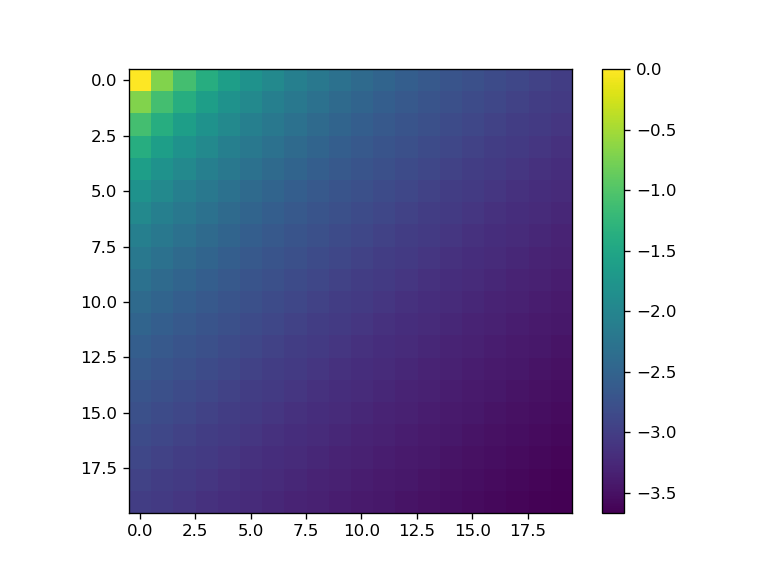

In [4]:
plt.figure()
plt.imshow(np.log(HH.astype(float)))
plt.colorbar();

<IPython.core.display.Javascript object>


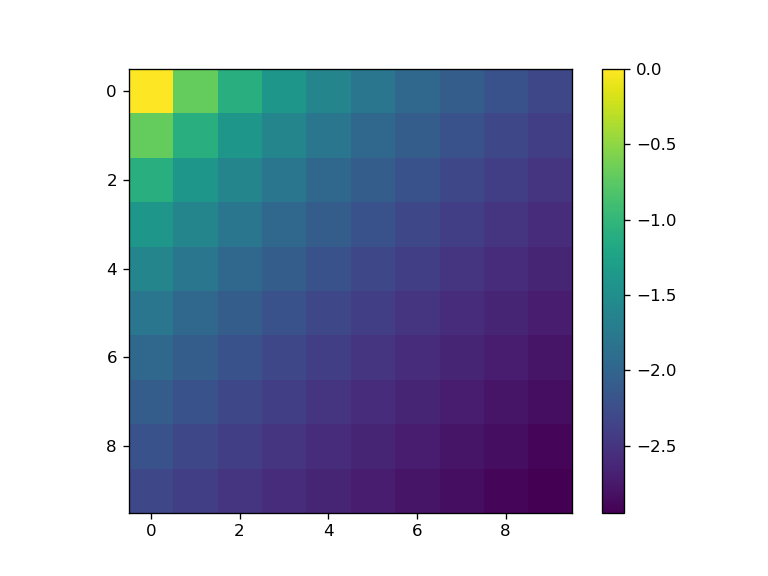

In [5]:
H = Matrix(10,10,lambda i,j : 1/(i+j+1))
HH = matrix2numpy(H)
plt.figure()
plt.imshow(np.log(HH.astype(float)))
plt.colorbar();

<IPython.core.display.Javascript object>


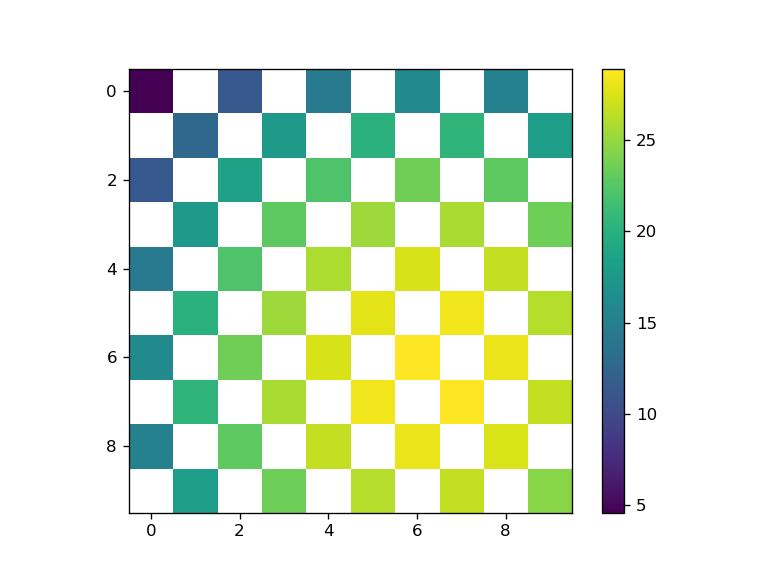

/local/schaedle/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [6]:
Hinv = H**(-1)
HHinv = matrix2numpy(Hinv)
plt.figure()
plt.imshow(np.log(HHinv.astype(float)))
plt.colorbar()

<IPython.core.display.Javascript object>


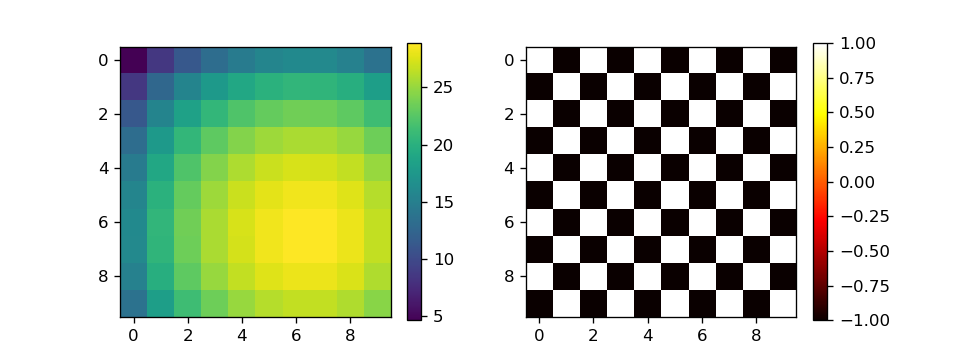

In [7]:
fig = plt.figure(figsize=(8,3))
fig.add_subplot(121)
plt.imshow(np.log(np.abs(HHinv.astype(float))))
plt.colorbar()
fig.add_subplot(122)
plt.imshow(np.sign(HHinv.astype(float)),cmap='hot')
plt.colorbar();

### Eigenwerte, Eigenvektoren, Jordannormalform

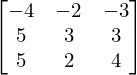

In [8]:
A = Matrix(3,3,[-4,-2,-3,5,3,3,5,2,4])
A

In [9]:
A.eigenvals()

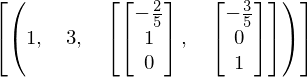

In [10]:
A.eigenvects()

In [11]:
A.diagonalize()

MatrixError: Matrix is not diagonalizable

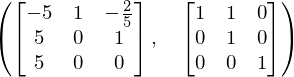

In [12]:
T,J = A.jordan_form()
T,J

In [13]:
T*J*T.inv() == A

True

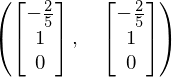

In [18]:
v = T[:,2]
v, A*v

### Berechung des Rangs

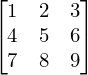

In [19]:
M = Matrix(3,3,range(1,10))
M

In [21]:
M.rank()

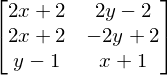

In [22]:
M = Matrix(3,2,[2*x+2,2*y-2,2*x+2,-2*y+2,y-1,x+1])
M

In [23]:
M.rank()

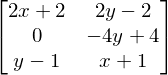

In [24]:
M.row_op(1,lambda r,j: r-M[0,j])
M1 = M.copy()
M1

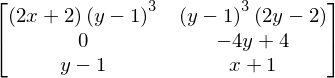

In [27]:
M1.row_op(0,lambda r,j: r*(y-1))    # falls y != 1
M2 = M1.copy()
M2

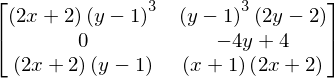

In [28]:
M2.row_op(2,lambda r,j: r*(2*x+2))  # falls x != -1
M3 = M2.copy()
M3

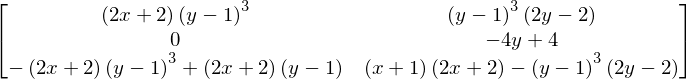

In [29]:

M3.row_op(2,lambda r,j: r-M3[0,j])
M4 = M3.copy()
M4

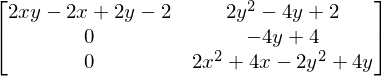

In [26]:
M4.expand()

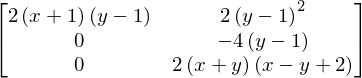

In [27]:
factor(M4) # Rang 2 falls x != -1 und y!=1

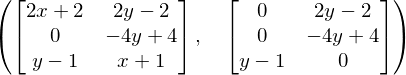

In [28]:
Mx = M.copy()
Mx = Mx.subs(x,-1)
M, Mx  # Rang 2 falls x = -1 und y!=1

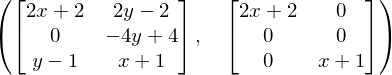

In [29]:
My = M.copy()
My = My.subs(y,1)
M, My   # Rang 2 falls x != -1 und y=1

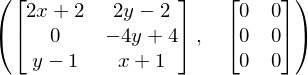

In [30]:
Mxy = M.copy()
M, Mxy.subs({x:-1,y:1})

### Normen

In [31]:
v = Matrix(1,3,[1,2,3])
v

In [32]:
v.norm()

In [33]:
v.norm(1)

In [34]:
v.norm(oo)

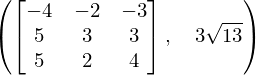

In [35]:
A, A.norm() # Frobenius Norm

In [36]:
sqrt(trace(A*A.T))

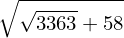

In [37]:
A.norm(2)

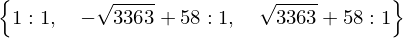

In [38]:
(A*A.T).eigenvals()

### Kreuzprodukt

In [39]:
w = Matrix(1,3,[1,-2,1])
v,w

In [40]:
z = v.cross(w)
z

In [41]:
w.cross(v)

## Reihenentwicklung (Taylor)

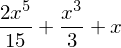

In [42]:
tr = tan(x).series(x,0,6)
tr.removeO()

In [45]:
ts = {}
for k in range(3,10,2):
    ts[k] = (x/(1+x**2)).series(x,0,k).removeO()

for tp in ts:
    print(tp)

3
5
7
9


<IPython.core.display.Javascript object>


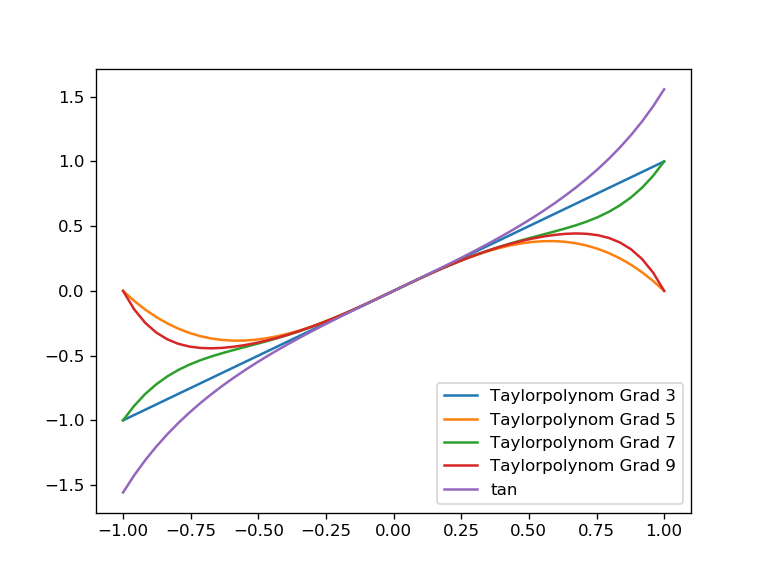

In [46]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-1,1)
for tp in ts:
    ax.plot(xn,lambdify(x,ts[tp])(xn),label='Taylorpolynom Grad {0}'.format(tp))
    
ax.plot(xn,np.tan(xn),label='tan')
plt.legend()
plt.legend(loc=4)
fig.show();

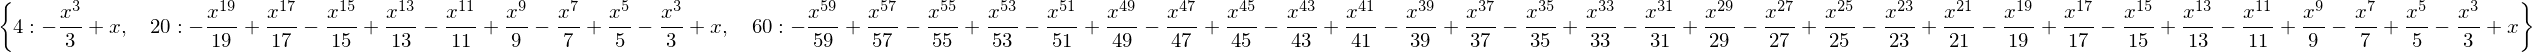

In [47]:
ar={}
for n in [4,20,60]:
    ar[n]= series(atan(x),x,0,n).removeO()
ar

<IPython.core.display.Javascript object>


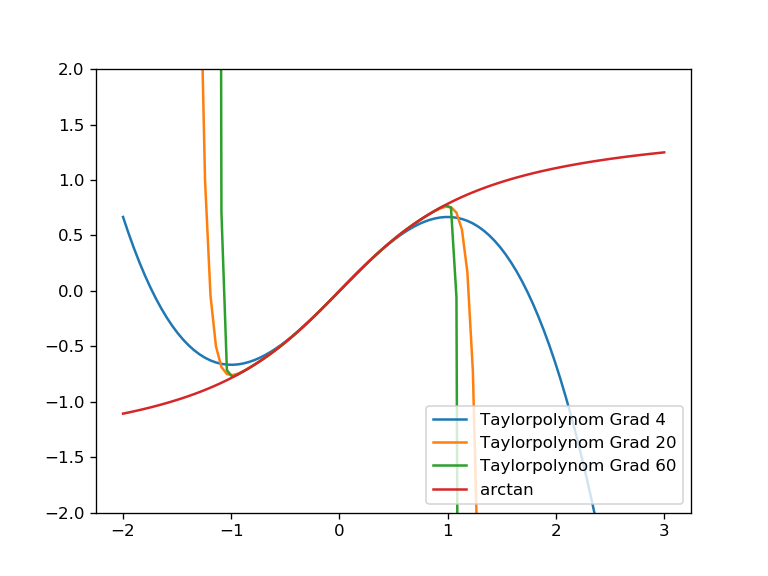

In [48]:
xn = np.linspace(-2,3,100)
fig2 = plt.figure()
ax = fig2.gca()
for tp in ar:
    ax.plot(xn,lambdify(x,ar[tp])(xn), \
            label='Taylorpolynom Grad {0}'.format(tp))
    
ax.plot(xn,np.arctan(xn),label='arctan')

ax.set_ylim(-2,2)
plt.legend()
plt.legend(loc=4)
fig2.show()

<IPython.core.display.Javascript object>


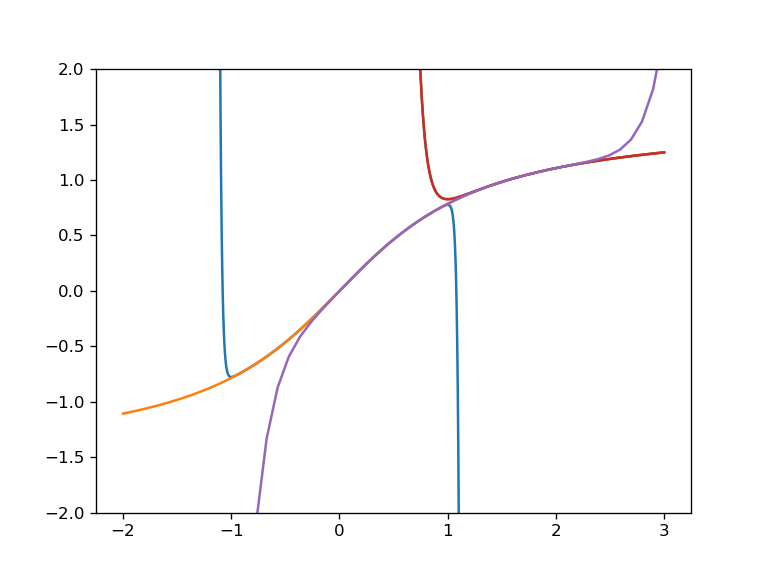

In [49]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-2,3,1000)
ax.plot(xn,lambdify(x,ar[60])(xn))
ax.plot(xn,np.arctan(xn))
ax.set_ylim(-2,2)

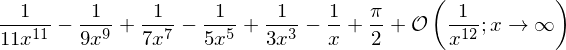

In [50]:
series(atan(x),x,oo,12)

In [51]:
ai = series(atan(x),x,oo,12).removeO()

In [53]:
xn2 = np.linspace(1/2,3,500)
ax.plot(xn2,lambdify(x,ai)(xn2))

In [54]:
a1 = series(atan(x),x,1,12).removeO()

In [55]:
xn1 = np.linspace(-2,3)
ax.plot(xn1,lambdify(x,a1)(xn1))

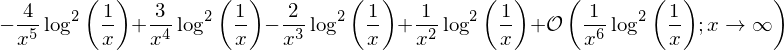

In [56]:
series(ln(x)**2/(1+x)**2,x,+oo)

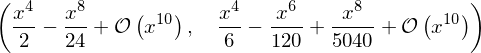

In [57]:
f = 1-cos(x**2) 
g = x*(x-sin(x))
f.series(x,0,10), g.series(x,0,10)

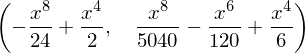

In [58]:
p = f.series(x,0,10).removeO()
q = g.series(x,0,10).removeO()
p,q

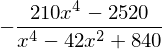

In [59]:
b = cancel(p/q)
b

In [60]:
b.subs(x,0)

In [61]:
limit(f/g,x,0)